In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

Loading in each of the three datasets.

In [ ]:
degree_original = pd.read_csv("degrees-that-pay-back.csv")
degree_original.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [ ]:
degree_original["Starting Median Salary"].max(), degree_original["Starting Median Salary"].min()

('$74,300.00', '$34,000.00')

In [ ]:
college_original = pd.read_csv('salaries-by-college-type.csv')
college_original.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [ ]:
college_original["Starting Median Salary"].max(), college_original["Starting Median Salary"].min()

('$75,500.00', '$34,800.00')

In [ ]:
region_original = pd.read_csv("salaries-by-region.csv")
region_original.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [ ]:
#Take only the relevant columns of each dataset 
degree = degree_original[["Undergraduate Major", "Starting Median Salary"]]
college = college_original[["School Name" , "School Type", "Starting Median Salary"]]
region = region_original[["School Name", "Region", "Starting Median Salary"]]

Making sure no NA values in our data.

In [ ]:
degree.isna().sum()

Undergraduate Major       0
Starting Median Salary    0
dtype: int64

In [ ]:
college.isna().sum()

School Name               0
School Type               0
Starting Median Salary    0
dtype: int64

In [ ]:
region.isna().sum()

School Name               0
Region                    0
Starting Median Salary    0
dtype: int64

In [ ]:
#Merge college and region data based on school name
#Used inner so only captures overlapping school names 
merge = pd.merge(college, region, how='inner')
merge = merge[["School Name", "Region", "School Type", "Starting Median Salary"]]
merge

,School Name,Region,School Type,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,"$72,200.00"
1,California Institute of Technology (CIT),California,Engineering,"$75,500.00"
2,Harvey Mudd College,California,Engineering,"$71,800.00"
3,"Polytechnic University of New York, Brooklyn",Northeastern,Engineering,"$62,400.00"
4,Cooper Union,Northeastern,Engineering,"$62,200.00"
...,...,...,...,...
263,Austin Peay State University,Southern,State,"$37,700.00"
264,Pittsburg State University,Midwestern,State,"$40,400.00"
265,Southern Utah University,Western,State,"$41,900.00"
266,Montana State University - Billings,Western,State,"$37,900.00"


In [ ]:
#Cast incomes as integers

merge["Starting Median Salary"] = merge["Starting Median Salary"].str.replace("$", "").str.replace(",","").str.strip("0").str.replace(".","").astype('int64')
merge["Starting Median Salary"]

0      72200
1      75500
2      71800
3      62400
4      62200
       ...  
263    37700
264    40400
265    41900
266    37900
267    35300
Name: Starting Median Salary, Length: 268, dtype: int64

Data should be clean now. Time to start the ML portion. 

In [ ]:
#Split into training and test set. 
X = merge[["School Name", "Region", "School Type"]]
y = merge[["Starting Median Salary"]]
#Linear regression and Ridge regession model jumped to around %10 higher r2 when test_size increased to .3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(214, 54, 214, 54)

In [ ]:
#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

In [ ]:
enc_train, enc_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]))

In [ ]:
#Linear Regression Model
reg = LinearRegression().fit(enc_train, y_train)
reg.score(enc_train, y_train)

1.0

In [ ]:
y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 3148.645958390474
MSE: 18762713.35813884
R2 Score: 0.596341609758108


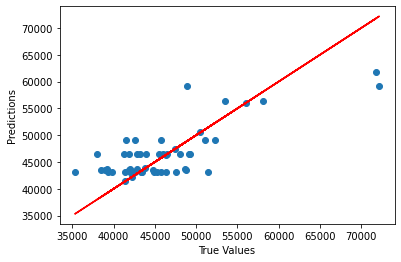

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')

The errors and R2 score are not promising. Will have to implement modifications to improve the model or just try different models. Possible reason for this is that there are only three variables we are inputting into the model, and one of them is unique (school name) so the only other thing they can base off of is region and school type, which there can only be so many combinations for a wide range of salaries.

Although I will note that I personally think a MAE of ~3000 is not bad 

In [ ]:
#Testing a Ridge Regression model with Cross Validation built in 
clf = RidgeCV()
clf.fit(enc_train, y_train)
clf.score(enc_train, y_train)

0.9965992776890643

In [ ]:
y_pred = clf.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 3331.6158702881025
MSE: 19558405.988618452
R2 Score: 0.579223189825129


In [ ]:
#Adjust prediction based off major

In [ ]:
#Decision Tree Implementation
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#One Hot Encoding Categorical Variables 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

In [ ]:
enc_train, enc_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]))

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(enc_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(enc_test)


In [ ]:
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3566.6666666666665
Mean Squared Error: 20354074.074074075
Root Mean Squared Error: 4511.54896616163
R2 Score: 0.5621052979503621


In [ ]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_253 <= 0.50
|   |--- feature_254 <= 0.50
|   |   |--- feature_248 <= 0.50
|   |   |   |--- feature_257 <= 0.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |--- feature_70 <= 0.50
|   |   |   |   |   |   |   |--- feature_234 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_166 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_30 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_172 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 35
|   |   |   |   |   |   |   |   |   |   |--- feature_172 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [52000.00]
|   |   |   |   |   |   |   |   |   |--- feature_30 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [52800.00]
|   |   |   |   |   |   |   |   |--- feature_166 >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [52900.00]
|   |   |   |   |   |   |   |--- feature_234 >  0.50
|   |   

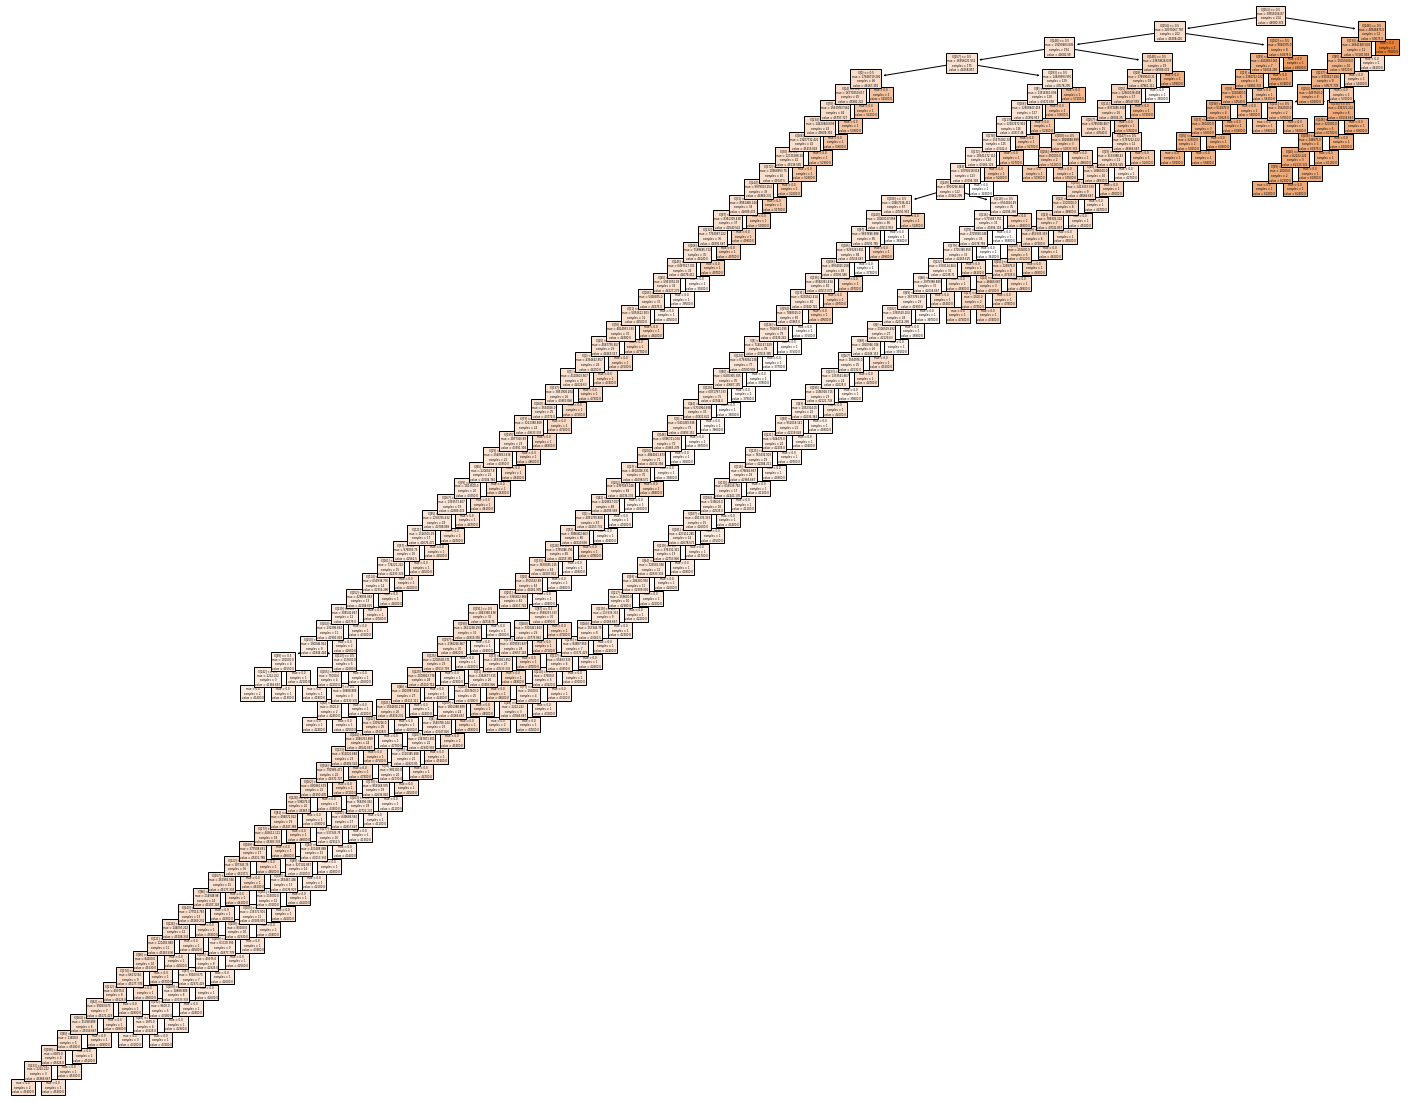

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, filled=True)
fig.savefig("decistion_tree.png")

In [ ]:
#Implementing a Random Forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor2 = RandomForestRegressor(n_estimators = 200, random_state = 0, max_depth = 300)
regressor2.fit(enc_train, y_train.values.ravel())

RandomForestRegressor(max_depth=300, n_estimators=200, random_state=0)

In [ ]:
y_pred = regressor2.predict(enc_test)

In [ ]:
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3012.712962962963
Mean Squared Error: 15026756.88425926
Root Mean Squared Error: 3876.4361060462816
R2 Score: 0.5559683647690905


In [ ]:
#Implementing a Support Vector Regressor
from sklearn.svm import SVR

In [ ]:
regressor3 = SVR()
regressor3.fit(enc_train, y_train.values.ravel())


SVR()

In [ ]:
y_pred = regressor3.predict(enc_test)

In [ ]:
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3872.7126884606823
Mean Squared Error: 33918919.50253039
Root Mean Squared Error: 5823.995149597086
R2 Score: -0.0022836868912705643
